### Universidad Católica "Nuestra Señora de la Asunción"
### Facultad de Ciencias y Tecnología
---

#Telecomunicaciones 1

#Laboratorio AM

---




**1) Generación de Señales AM DSB_FC:**

$s(t)=A_c [1 +k_a m(t)] \cos(2 \pi f_c t)$

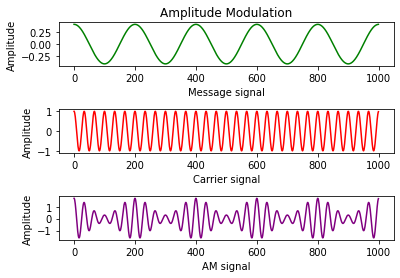

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Carrier wave c(t)=A_c*cos(2*pi*f_c*t)
#Modulating wave m(t)=A_m*cos(2*pi*f_m*t)
#Modulated wave s(t)=A_c[1+mu*cos(2*pi*f_m*t)]cos(2*pi*f_c*t)

#A_c = float(input('Enter carrier amplitude: '))
A_c = 1
#f_c = float(input('Enter carrier frquency: '))
f_c=30
#A_m = float(input('Enter message amplitude: '))
A_m=0.4
#f_m = float(input('Enter message frquency: '))
f_m=5
#modulation_index = float(input('Enter modulation index: '))
modulation_index=0.7

Ts=0.001
t = np.arange(0, 1, Ts)

c = A_c*np.cos(2*np.pi*f_c*t)
m = A_m*np.cos(2*np.pi*f_m*t)
s = A_c*(1+modulation_index*np.cos(2*np.pi*f_m*t))*np.cos(2*np.pi*f_c*t)

plt.subplot(3,1,1)
plt.title('Amplitude Modulation')
plt.plot(m,'g')
plt.ylabel('Amplitude')
plt.xlabel('Message signal')

plt.subplot(3,1,2)
plt.plot(c, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Carrier signal')

plt.subplot(3,1,3)
plt.plot(s, color="purple")
plt.ylabel('Amplitude')
plt.xlabel('AM signal')

plt.subplots_adjust(hspace=1)
plt.rc('font', size=15)
fig = plt.gcf()
#fig.set_size_inches(16, 9)

fig.savefig('Amplitude Modulation.png', dpi=100)

**2) Espectro de Señales AM DSB_FC:**

$s(t)=A_c [1 +k_a m(t)] \cos(2 \pi f_c t)$

$S(f)$= 

In [3]:
import warnings
warnings.simplefilter("ignore", np.ComplexWarning)
from numpy.fft import fft, ifft

M = fft(m)  # Realizamos la FFT del mensaje

N = len(M)  # Guardamos la longitud del vector de salida (misma que de entrada)

n = np.arange(N)  # Vector de puntos de la FFT
Epoca = N*Ts      # Tiempo de la ventana en tiempo de la muestrs
freq = n/Epoca    # Obtenemos el vector de frecuencias

plt.figure(figsize = (12, 3))
plt.subplot(122)

plt.stem(freq, np.abs(M), linefmt='grey', markerfmt=" ", bottom=1.1, basefmt="-b", use_line_collection=True)
#plt.stem(freq, np.abs(M), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('$|M(f)|$')
plt.xlim(0, 50)

plt.subplot(121)
plt.plot(t, ifft(M), 'b')
plt.xlabel('Time (s)')
plt.ylabel('$m(t)$')
plt.tight_layout()
plt.show()

plt.stem(freq, np.abs(C), linefmt='grey', markerfmt=" ", bottom=1.1, basefmt="-b", use_line_collection=True)
#plt.stem(freq, np.abs(M), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('$|M(f)|$')
plt.xlim(0, 50)

plt.subplot(221)
plt.plot(t, ifft(C), 'b')
plt.xlabel('Time (s)')
plt.ylabel('$m(t)$')
plt.tight_layout()
plt.show()

plt.stem(freq, np.abs(S), linefmt='grey', markerfmt=" ", bottom=1.1, basefmt="-b", use_line_collection=True)
#plt.stem(freq, np.abs(M), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('$|M(f)|$')
plt.xlim(0, 50)

plt.subplot(321)
plt.plot(t, ifft(S), 'b')
plt.xlabel('Time (s)')
plt.ylabel('$m(t)$')
plt.tight_layout()
plt.show()


NameError: ignored

**3) Demodulación**

Método Detector de Envolvente (Rectificación + Lowpass Filter)


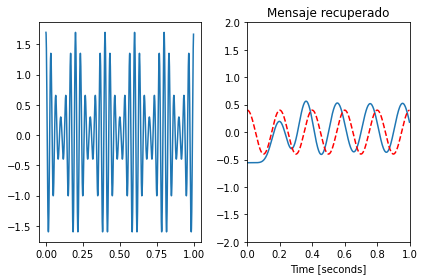

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

#scipy.signal.butter(N, Wn, btype='low', analog=False, output='ba', fs=None)[source]
sos = signal.butter(10, 7, 'lowpass', analog=False, fs=1/Ts, output='sos')
message=signal.sosfilt(sos, abs(s))

plt.subplot(121)
plt.plot(t, s)
plt.subplot(122)
plt.plot(t, message-np.mean(message))
plt.plot(t, m, 'r--')
plt.title('Mensaje recuperado')
plt.axis([0, 1, -2, 2])
plt.xlabel('Time [seconds]')
plt.tight_layout()
plt.show()

                                                                                                                                                                              Método Detector de Envolvente (envolvente compleja)

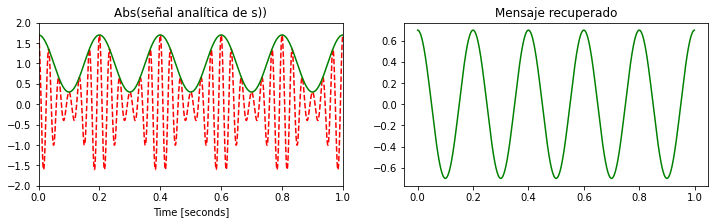

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert, chirp

analytic_signal = hilbert(s)  # Obtiene la señal analítica 
m = np.abs(analytic_signal)

plt.figure(figsize = (12, 3))
plt.subplot(121)
plt.plot(t, s,'r--')
plt.plot(t, m, 'g')
plt.title('Abs(señal analítica de s))')
plt.axis([0, 1, -2, 2])
plt.xlabel('Time [seconds]')
plt.subplot(122)
plt.title('Mensaje recuperado')
plt.plot(t, m-np.mean(m), 'g')
#plt.rc('font', size=1)
plt.show()
